## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
df_train = pd.read_csv('Titanic_train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data = df_train[['Pclass', 'Sex', 'Age']]

In [5]:
missing_vals = df_train.isnull().sum() / len(df_train)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals.sort_values(by=['missing_rate'], ascending=False))

             missing_rate
Cabin            0.771044
Age              0.198653
Embarked         0.002245
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000


In [6]:
# 細看遺失資料的樣態
missing_index = df_train.isnull()
display(df_train[missing_index.values==True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 觀察 Age

In [7]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

29.69911764705882
14.526497332334042


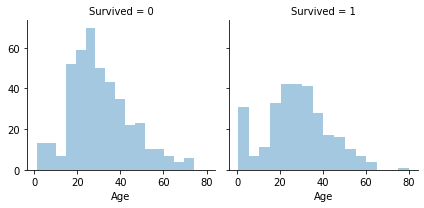

In [8]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差

# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

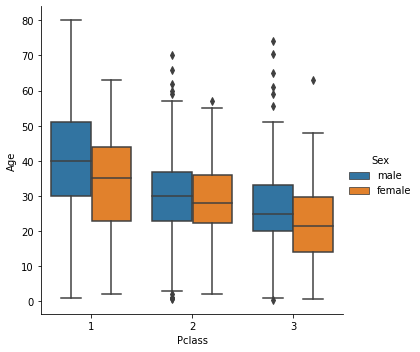

In [9]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")

我們試著用 Pclass和 Sex 來透過 KNN 來補值

In [10]:
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.

le = preprocessing.LabelEncoder()
df_train['Pclass'] = le.fit_transform(df_train['Pclass'])

df_train['Sex'] = le.fit_transform(df_train['Sex'])

data = df_train[['Sex','Age','Pclass']]

In [11]:
data

,Sex,Age,Pclass
0,1,22.0,2
1,0,38.0,0
2,0,26.0,2
3,0,35.0,0
4,1,35.0,2
...,...,...,...
886,1,27.0,1
887,0,19.0,0
888,0,NaN,2
889,1,26.0,0


In [12]:
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])
display(df_filled)

,Sex,Age,Pclass
0,1,22.0,2
2,0,26.0,2
4,1,35.0,2
5,1,NaN,2
5,1,NaN,2
...,...,...,...
885,0,39.0,2
886,1,27.0,1
888,0,NaN,2
888,0,NaN,2


,0,1,2
0,1.0,22.0,2.0
2,0.0,26.0,2.0
4,1.0,35.0,2.0
5,1.0,22.0,2.0
5,1.0,22.0,2.0
...,...,...,...
885,0.0,39.0,2.0
886,1.0,27.0,1.0
888,0.0,26.0,2.0
888,0.0,26.0,2.0


,0,1,2
0,1.0,22.0,2.0
1,0.0,38.0,0.0
2,0.0,26.0,2.0
3,0.0,35.0,0.0
4,1.0,35.0,2.0
...,...,...,...
886,1.0,27.0,1.0
887,0.0,19.0,0.0
888,0.0,26.0,2.0
889,1.0,26.0,0.0
